# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">2. Level 1 Classification</h3>**
### **<h3 align="center">Group 30 - Project</h3>**


### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 2021546@novaims.unl.pt       | 2021546    |



---

### **2. Level 1 Classification Notebook**
**Description:**
In this notebook, we will build and evaluate the Level 1 Classification model, which separates the data into three categories:
- Class 2 - NON-COMP
- Class 4 - TEMPORARY
- Other (all remaining classes, such as MED ONLY, PPD SCH LOSS, CANCELLED, etc.)

Key steps include:
- Loading the **preprocessed dataset** created in Notebook 1.
- **Feature selection:** Identify features most relevant to this binary classification task.
- **Model training:** Train a binary classification model to distinguish between the "Common" and "Other" categories.
- **Evaluation:** Assess the performance of the Level 1 model using metrics like accuracy, precision, and recall.
- **Output:** Save predictions to pass data into the next stages (Level 2 Binary and Level 2 Multi-Class models).

This notebook ensures that data is efficiently routed into the appropriate paths for the subsequent levels.

---


## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Load and Prepare Datasets](#chapter2)
* [3. Setting the Target](#chapter3)
* [4. Feature Selection](#chapter4)
    * [Scaling the Data](#section_4_1)  
    * [Numerical Features](#section_4_2) 
    * [Categorical Features](#section_4_3) 
    * [Final Features](#section_4_3)
* [5. Modelling](#chapter5)
* [6. Loading the results](#chapter6)


# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>

In [4]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile

# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Feature Selection Methods ---
# Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Wrapper Methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Evaluation Metrics ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')


#selecionar apenas as função que vamos usar neste :)
from utils import *

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>

Now that we preprocessed the dataset in notebook 1. Preprocessing and Feature Engineering we will upload those datasets

In [5]:
X_train = pd.read_csv('..\Data_Temporary\X_train_processed.csv', index_col='Claim Identifier')
X_val = pd.read_csv('..\Data_Temporary\X_val_processed.csv', index_col='Claim Identifier')
df_test= pd.read_csv('..\Data_Temporary\df_test_processed.csv', index_col='Claim Identifier')

In [6]:
X_train.head(5)

,Age at Injury,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,...,promptness_category,promptness_C2_category,Zip_Code_Simplified,Carrier Type Merged,Carrier_Name_Simplified,Body_Part_Category,Injury_Nature_Category,Injury_Cause_Category,Industry Risk,Salary_Per_Dependent
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5479022,24,0.0,816.297482,1996.0,STATE INSURANCE FUND,SIF,CAYUGA,0.0,SYRACUSE,M,...,Until 1 weeks,Until 1 weeks,OTHER,SIF,STATE INSURANCE FUND,Lower Extremities,Specific Injury,Strain or Injury By,High Risk,204.074371
6023025,36,1.0,1097.000000,1986.0,SIRIUSPOINT AMERICA INSURANCE,PRIVATE,QUEENS,0.0,NYC,M,...,1 to 3 months,1 to 3 months,11368,PRIVATE,OTHER,Multiple Body Parts,Specific Injury,"Fall, Slip, or Trip",High Risk,365.666667
5851908,41,1.0,623.350000,1980.0,INDEMNITY INS. OF N AMERICA,PRIVATE,MONROE,0.0,ROCHESTER,F,...,3 to 6 months,3 to 6 months,OTHER,PRIVATE,INDEMNITY INS. OF N AMERICA,Upper Extremities,Specific Injury,Strain or Injury By,High Risk,155.837500
5913931,59,1.0,1042.130000,1963.0,INDEMNITY INS. OF N AMERICA,PRIVATE,ALBANY,0.0,ALBANY,M,...,Until 1 weeks,Until 1 weeks,12065,PRIVATE,INDEMNITY INS. OF N AMERICA,Upper Extremities,Specific Injury,"Fall, Slip, or Trip",High Risk,521.065000
5845976,58,0.0,1225.703472,1963.0,SECURITY NATIONAL INSURANCE CO,PRIVATE,KINGS,0.0,NYC,F,...,1 to 3 months,1 to 3 months,11203,PRIVATE,SECURITY NATIONAL INSURANCE CO,Multiple Body Parts,Multiple Injuries,"Fall, Slip, or Trip",Medium Risk,204.283912


In [7]:
# Load the arrays
y_train = np.load(r'..\Data_Temporary\y_train.npy', allow_pickle=True)
y_val = np.load(r'..\Data_Temporary\y_val.npy', allow_pickle=True)

# 3. Setting the Target <a class="anchor" id="chapter3"></a>

In this section, we will analyze the distribution of the target variable to better understand its composition. This step is crucial for determining how to split the target into the two categories needed for the first level of the hierarchical classification: identifying the most common classes versus the "Other" category.

In [8]:
# Convert to Pandas Series and get value counts
y_train_series = pd.Series(y_train)
y_train_series.value_counts()

2. NON-COMP        202442
4. TEMPORARY       103933
3. MED ONLY         48224
5. PPD SCH LOSS     33795
1. CANCELLED         7255
6. PPD NSL           2948
8. DEATH              329
7. PTD                 68
Name: count, dtype: int64

In [9]:
# Convert to Pandas Series and get value counts
y_val_series = pd.Series(y_val)
y_val_series.value_counts()

2. NON-COMP        87324
4. TEMPORARY       44552
3. MED ONLY        20672
5. PPD SCH LOSS    14484
1. CANCELLED        3743
6. PPD NSL          1263
8. DEATH             141
7. PTD                29
Name: count, dtype: int64

In [10]:
# Create a new mapping where 2 -> 2, 4 -> 4, and all other classes -> 'Other'
def map_to_three_classes(y):
    # Set Class 2 (NON-COMP) and Class 4 (TEMPORARY) as they are
    # All other classes will be labeled as 'Other'
    return np.where(np.isin(y, ['2. NON-COMP', '4. TEMPORARY']), y, 'Other')

# Apply the function to y_train and y_val
y_train_new = map_to_three_classes(y_train)
y_val_new = map_to_three_classes(y_val)

# Ensure that the result is of the correct dtype (e.g., np.array of integers or string types)
print(np.unique(y_train_new))  # Check the new classes in y_train
print(np.unique(y_val_new))    # Check the new classes in y_val

['2. NON-COMP' '4. TEMPORARY' 'Other']
['2. NON-COMP' '4. TEMPORARY' 'Other']


In [11]:
# Convert to Pandas Series and get value counts
y_train_new_series = pd.Series(y_train_new)
y_train_new_series.value_counts()

2. NON-COMP     202442
4. TEMPORARY    103933
Other            92619
Name: count, dtype: int64

In [12]:
# Convert to Pandas Series and get value counts
y_val_new_series = pd.Series(y_val_new)
y_val_new_series.value_counts()

2. NON-COMP     87324
4. TEMPORARY    44552
Other           40332
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Encode y_train_new and y_val_new
y_train_encoded = encoder.fit_transform(y_train_new)  # Fit and transform on y_train_new
y_val_encoded = encoder.transform(y_val_new)  # Only transform on y_val_new

# 4. Feature Selection <a class="anchor" id="chapter4"></a>

The feature selection process involves summarizing the essential features in the dataset to help the model focus on the most relevant information. Here, we assess the categorical and numerical variables in `X_train_processed` by examining unique values, descriptive statistics, and verifying the correctness of categorical bins and continuous feature distributions.

The `X_train_processed.describe(include='O').T` command provides an overview of the categorical features in the dataset, displaying the count, unique values, top (most frequent) category, and its frequency. This summary helps us understand the distribution and cardinality of each categorical feature, which is essential for feature selection and preprocessing.

#### Descriptive Statistics for Categorical Features

In [14]:
# Displaying descriptive statistics for categorical features in the training dataset
X_train.describe(include='O').T

,count,unique,top,freq
Carrier Name,398994,1960,STATE INSURANCE FUND,77168
Carrier Type,398994,8,PRIVATE,198800
County of Injury,398994,63,SUFFOLK,41965
District Name,398994,8,NYC,188402
Gender,398994,3,M,232838
Medical Fee Region,398994,5,IV,185033
Zip Code,398993,9088,11236,3849
Carrier_District_Interaction,398994,52,PRIVATE_NYC,92172
Income_Category,398994,4,Lower-Middle Income,101143
Age Group,398994,4,Young Adult,199496


This table provides insight into the number of unique categories within each feature, assisting in identifying high-cardinality features that may need simplification or encoding before modeling.

The next output explores the Income_Category feature specifically, showing its categorical distribution across different income levels.

In [15]:
# Exploring the distribution of Income_Category
X_train['Income_Category']

Claim Identifier
5479022             Low Income
6023025    Lower-Middle Income
5851908             Low Income
5913931    Lower-Middle Income
5845976    Upper-Middle Income
                  ...         
5655355             Low Income
5940234            High Income
6073417            High Income
5822576    Lower-Middle Income
5566085            High Income
Name: Income_Category, Length: 398994, dtype: object

The `Income_Category` feature categorizes the `Average Weekly Wage` into four levels:
- **Low Income**
- **Lower-Middle Income**
- **Upper-Middle Income**
- **High Income**

This feature provides a socioeconomic context for the claims, allowing the model to account for income-based disparities in claims.

#### Descriptive Statistics for Numerical Features

In [16]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,398994.0,42.908502,12.927821,16.000000,32.000000,43.000000,53.000000,80.00
Attorney/Representative,398994.0,0.315416,0.464682,0.000000,0.000000,0.000000,1.000000,1.00
Average Weekly Wage,398994.0,1246.125215,7036.444450,17.410000,865.022500,1197.862575,1530.970000,2828079.00
Birth Year,398994.0,1977.938823,13.038683,1918.101209,1968.000000,1978.101209,1988.000000,2006.00
COVID-19 Indicator,398994.0,0.048058,0.213890,0.000000,0.000000,0.000000,0.000000,1.00
IME-4 Count,398994.0,0.747054,1.928570,0.000000,0.000000,0.000000,0.000000,73.00
Industry Code,398994.0,58.553357,19.740185,11.000000,45.000000,61.000000,71.000000,92.00
WCIO Cause of Injury Code,398994.0,54.455566,25.606069,1.000000,31.000000,56.000000,75.000000,99.00
WCIO Nature of Injury Code,398994.0,41.251708,22.036754,1.000000,25.000000,49.000000,52.000000,91.00
WCIO Part Of Body Code,398994.0,47.898392,22.887278,10.000000,35.000000,42.000000,55.000000,101.00


These features provide comprehensive information across demographics, injury details, socioeconomics, and temporal aspects, making them well-suited to predicting claim outcomes.

In [17]:
X_train.columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'Carrier_District_Interaction',
       'Income_Category', 'Days_To_First_Hearing', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category', 'Zip_Code_Simplified',
       'Carrier Type Merged', 'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category', 'Industry Risk',
       'Salary_Per_Dependent'],
      dtype='object')

#### Analysis of `Age Group`

In [18]:
X_train['Age Group']

Claim Identifier
5479022          Youth
6023025    Young Adult
5851908    Young Adult
5913931     Middle Age
5845976     Middle Age
              ...     
5655355         Senior
5940234    Young Adult
6073417     Middle Age
5822576    Young Adult
5566085    Young Adult
Name: Age Group, Length: 398994, dtype: object

This feature allows the model to understand age-related variations in claims, which could influence the type and nature of injuries.

This structured feature selection summary provides insights into the main features, both categorical and numerical, used in the model. The focus on grouping, simplification, and categorization ensures the model captures the relevant patterns without unnecessary complexity.

#### Analysis of `Zip Code`

In [19]:
X_train['County of Injury'].unique()

array(['CAYUGA', 'QUEENS', 'MONROE', 'ALBANY', 'KINGS', 'WESTCHESTER',
       'JEFFERSON', 'NEW YORK', 'BROOME', 'NASSAU', 'CHEMUNG', 'BRONX',
       'SUFFOLK', 'DUTCHESS', 'ERIE', 'CLINTON', 'CHAUTAUQUA', 'ORANGE',
       'ONEIDA', 'RICHMOND', 'FULTON', 'MONTGOMERY', 'CATTARAUGUS',
       'ULSTER', 'SARATOGA', 'RENSSELAER', 'ONONDAGA', 'UNKNOWN',
       'ROCKLAND', 'SENECA', 'OSWEGO', 'DELAWARE', 'ST. LAWRENCE',
       'NIAGARA', 'ESSEX', 'WASHINGTON', 'ONTARIO', 'OTSEGO', 'WARREN',
       'ORLEANS', 'PUTNAM', 'ALLEGANY', 'HERKIMER', 'MADISON', 'WYOMING',
       'SCHENECTADY', 'LIVINGSTON', 'LEWIS', 'FRANKLIN', 'HAMILTON',
       'SULLIVAN', 'WAYNE', 'COLUMBIA', 'TOMPKINS', 'STEUBEN', 'CORTLAND',
       'GREENE', 'TIOGA', 'GENESEE', 'SCHUYLER', 'CHENANGO', 'SCHOHARIE',
       'YATES'], dtype=object)

In [20]:
# Count the number of unique values in the 'County of Injury' column
unique_count = X_train['County of Injury'].nunique()

print(f"Number of unique values in 'County of Injury': {unique_count}")

Number of unique values in 'County of Injury': 63


In [21]:
# Ensure ZipCode is treated as a string
X_train['Zip Code'] = X_train['Zip Code'].astype(str)

# Filter out rows where the first three characters are not digits
filtered_df = X_train[X_train['Zip Code'].str[:3].str.isdigit()]

# Convert the first three digits to integers and count rows in the range 100-149
count = filtered_df[filtered_df['Zip Code'].str[:3].astype(int).between(100, 149)].shape[0]

print(f"Number of rows where the first three digits of ZipCode are between 100 and 149: {count}")

Number of rows where the first three digits of ZipCode are between 100 and 149: 377833


In [22]:
#Proportion of Zip Codes that belong to New York
514183 / len(X_train)

1.2886985769209562

In [23]:
New_York_allcounties = [
    "Albany", "Allegany", "Bronx", "Broome", "Cattaraugus", "Cayuga", "Chautauqua", "Chemung", 
    "Chenango", "Clinton", "Columbia", "Cortland", "Delaware", "Dutchess", "Erie", "Essex", 
    "Franklin", "Fulton", "Genesee", "Greene", "Hamilton", "Herkimer", "Jefferson", "Kings", 
    "Lewis", "Livingston", "Madison", "Monroe", "Montgomery", "Nassau", "New York", "Niagara", 
    "Oneida", "Onondaga", "Ontario", "Orange", "Orleans", "Oswego", "Otsego", "Putnam", "Queens", 
    "Rensselaer", "Richmond", "Rockland", "Saratoga", "Schenectady", "Schoharie", "Schuyler", 
    "Seneca", "St. Lawrence", "Steuben", "Suffolk", "Sullivan", "Tioga", "Tompkins", "Ulster", 
    "Warren", "Washington", "Wayne", "Westchester", "Wyoming", "Yates"
]

In [24]:
New_York_allcounties_caps = [
    "ALBANY", "ALLEGANY", "BRONX", "BROOME", "CATTARAUGUS", "CAYUGA", "CHAUTAUQUA", "CHEMUNG",
    "CHENANGO", "CLINTON", "COLUMBIA", "CORTLAND", "DELAWARE", "DUTCHESS", "ERIE", "ESSEX",
    "FRANKLIN", "FULTON", "GENESEE", "GREENE", "HAMILTON", "HERKIMER", "JEFFERSON", "KINGS",
    "LEWIS", "LIVINGSTON", "MADISON", "MONROE", "MONTGOMERY", "NASSAU", "NEW YORK", "NIAGARA",
    "ONEIDA", "ONONDAGA", "ONTARIO", "ORANGE", "ORLEANS", "OSWEGO", "OTSEGO", "PUTNAM", "QUEENS",
    "RENSSELAER", "RICHMOND", "ROCKLAND", "SARATOGA", "SCHENECTADY", "SCHOHARIE", "SCHUYLER",
    "SENECA", "ST. LAWRENCE", "STEUBEN", "SUFFOLK", "SULLIVAN", "TIOGA", "TOMPKINS", "ULSTER",
    "WARREN", "WASHINGTON", "WAYNE", "WESTCHESTER", "WYOMING", "YATES"
]

In [25]:
# Assuming your data is in a pandas DataFrame named df_train and the column is 'county_of_injury'

# Convert the 'county_of_injury' column to a set for comparison
used_counties = set(X_train['County of Injury'].dropna().str.title())  # Normalize case

# Compare with the New_York_allcounties list
used_in_list = used_counties.intersection(New_York_allcounties_caps)
not_used_in_list = set(New_York_allcounties_caps) - used_counties

# Results
print(f"Number of counties used in the dataset that match the New York counties: {len(used_in_list)}")
print(f"Counties used in the dataset that match: {sorted(used_in_list)}")
print(f"Number of New York counties not used in the dataset: {len(not_used_in_list)}")
print(f"Counties not used: {sorted(not_used_in_list)}")


Number of counties used in the dataset that match the New York counties: 0
Counties used in the dataset that match: []
Number of New York counties not used in the dataset: 62
Counties not used: ['ALBANY', 'ALLEGANY', 'BRONX', 'BROOME', 'CATTARAUGUS', 'CAYUGA', 'CHAUTAUQUA', 'CHEMUNG', 'CHENANGO', 'CLINTON', 'COLUMBIA', 'CORTLAND', 'DELAWARE', 'DUTCHESS', 'ERIE', 'ESSEX', 'FRANKLIN', 'FULTON', 'GENESEE', 'GREENE', 'HAMILTON', 'HERKIMER', 'JEFFERSON', 'KINGS', 'LEWIS', 'LIVINGSTON', 'MADISON', 'MONROE', 'MONTGOMERY', 'NASSAU', 'NEW YORK', 'NIAGARA', 'ONEIDA', 'ONONDAGA', 'ONTARIO', 'ORANGE', 'ORLEANS', 'OSWEGO', 'OTSEGO', 'PUTNAM', 'QUEENS', 'RENSSELAER', 'RICHMOND', 'ROCKLAND', 'SARATOGA', 'SCHENECTADY', 'SCHOHARIE', 'SCHUYLER', 'SENECA', 'ST. LAWRENCE', 'STEUBEN', 'SUFFOLK', 'SULLIVAN', 'TIOGA', 'TOMPKINS', 'ULSTER', 'WARREN', 'WASHINGTON', 'WAYNE', 'WESTCHESTER', 'WYOMING', 'YATES']


In [26]:
# Count rows where 'County of Injury' is "Unknown"
unknown_count = X_train['County of Injury'].str.contains("UNKNOWN", na=False).sum()

print(f"Number of rows with 'Unknown' in 'County of Injury': {unknown_count}")

Number of rows with 'Unknown' in 'County of Injury': 833


This means that we can choose between the variable Zip Code and County of Injury since they are explaining the same thing about our data. As we saw that 88 percent of Zip Codes can be explained by the variable County of Injury and that the place where people work is even more important than the place where people live we decided to drop Zip Code and use only County of Injury.

### Feature Categories
The features have been organized into three main categories: **Categorical Features**, **Binary Features**, and **Discrete Features**. Each category represents a different data type or structure, allowing for tailored preprocessing steps and analysis.

In [27]:
X_train.columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'Carrier_District_Interaction',
       'Income_Category', 'Days_To_First_Hearing', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category', 'Zip_Code_Simplified',
       'Carrier Type Merged', 'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category', 'Industry Risk',
       'Salary_Per_Dependent'],
      dtype='object')

In [28]:
# Updating the feature categories with the new columns created
categorical_columns = [
    'Carrier_Name_Simplified','County of Injury', 
    'District Name', 'Gender', 'Medical Fee Region', 
    'Carrier_District_Interaction',
    'Zip_Code_Simplified', 'Carrier Type Merged','Income_Category','Age Group', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code','Body_Part_Category',
    'Injury_Nature_Category', 'Injury_Cause_Category',
    #'promptness_category','promptness_C2_category',
    'Carrier Name','Carrier Type',
    'Zip Code', 'Industry Risk'
]

binary_columns = [
    'Attorney/Representative', 'COVID-19 Indicator',
     'Accident on Weekend'
]

discrete_columns = [ 'Number of Dependents', 'IME-4 Count',
    'Accident_Quarter', 'Accident_Year', 'Accident Day'
]

continuous_columns = ['Days_To_First_Hearing','Average Weekly Wage','Age at Injury',
                      'Salary_Per_Dependent'
                      ]

# Printing the feature categories
print("Categorical Features:", categorical_columns)
print("Binary Features:", binary_columns)
print("Discrete Features:", discrete_columns)
print("Continuous Features:", continuous_columns)

Categorical Features: ['Carrier_Name_Simplified', 'County of Injury', 'District Name', 'Gender', 'Medical Fee Region', 'Carrier_District_Interaction', 'Zip_Code_Simplified', 'Carrier Type Merged', 'Income_Category', 'Age Group', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Body_Part_Category', 'Injury_Nature_Category', 'Injury_Cause_Category', 'Carrier Name', 'Carrier Type', 'Zip Code', 'Industry Risk']
Binary Features: ['Attorney/Representative', 'COVID-19 Indicator', 'Accident on Weekend']
Discrete Features: ['Number of Dependents', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day']
Continuous Features: ['Days_To_First_Hearing', 'Average Weekly Wage', 'Age at Injury', 'Salary_Per_Dependent']


## 4.1. Preparing Data</b> <a class="anchor" id="section_4_1"></a>
### Converting Discrete Columns to Integer
In this step, we ensure all discrete columns are converted to integer data types across the training, validation, and test datasets. This is crucial for consistent data handling and processing in subsequent steps.

In [29]:
# Convert discrete columns to integer
for column in discrete_columns:
    X_train[column] = X_train[column].astype(int)
    X_val[column] = X_val[column].astype(int)
    df_test[column] = df_test[column].astype(int)

### Scaling Features
We apply the RobustScaler to the discrete columns. RobustScaler is beneficial for data containing outliers, as it scales data based on the median and interquartile range. This helps normalize the distribution without being heavily affected by outliers. We also use the same scaler to transform validation and test data.

In [30]:
#scaling features
# Usar robustscaler para dados que contêm outliers
# Usar minmaxscaler para dados que não têm outliers 
from sklearn.preprocessing import MinMaxScaler
feat_scaler = MinMaxScaler()
X_train[discrete_columns + continuous_columns] = feat_scaler.fit_transform(X_train[discrete_columns + continuous_columns])

X_train_num_scaled = X_train[discrete_columns + continuous_columns]

#apply same transformation for val data
X_val[discrete_columns + continuous_columns] = feat_scaler.transform(X_val[discrete_columns + continuous_columns])

X_val_num_scaled = X_val[discrete_columns + continuous_columns]

#apply same transformation for test data
df_test[discrete_columns + continuous_columns] = feat_scaler.transform(df_test[discrete_columns + continuous_columns])
df_test_num_scaled = df_test[discrete_columns + continuous_columns]

#X_val, X_train
X_train_num_scaled

,Number of Dependents,IME-4 Count,Accident_Quarter,Accident_Year,Accident Day,Days_To_First_Hearing,Average Weekly Wage,Age at Injury,Salary_Per_Dependent
Claim Identifier,,,,,,,,,
5479022,0.500000,0.000000,0.333333,0.951613,0.166667,0.025765,0.000282,0.125000,0.000284
6023025,0.333333,0.054795,0.333333,0.983871,0.166667,0.032369,0.000382,0.312500,0.000512
5851908,0.500000,0.027397,0.333333,0.967742,0.333333,0.065869,0.000214,0.390625,0.000216
5913931,0.166667,0.027397,0.000000,0.983871,0.500000,0.042663,0.000362,0.671875,0.000732
5845976,0.833333,0.000000,0.666667,0.967742,0.166667,0.025765,0.000427,0.656250,0.000284
...,...,...,...,...,...,...,...,...,...
5655355,0.500000,0.000000,0.000000,0.967742,0.333333,0.025765,0.000290,0.781250,0.000292
5940234,0.500000,0.000000,0.000000,0.983871,0.500000,0.025765,0.000707,0.296875,0.000708
6073417,0.000000,0.027397,0.666667,0.983871,0.166667,0.025765,0.000783,0.625000,0.003154


### Variance Check After Scaling
After scaling, we check the variance of each scaled feature to confirm that the features have been scaled properly. Lower variance after scaling indicates that data is normalized and less affected by magnitude differences.

In [31]:
# Check variance of scaled data
X_train_num_scaled.var()

Number of Dependents     0.111200
IME-4 Count              0.000698
Accident_Quarter         0.140603
Accident_Year            0.000853
Accident Day             0.092262
Days_To_First_Hearing    0.000249
Average Weekly Wage      0.000006
Age at Injury            0.040803
Salary_Per_Dependent     0.000008
dtype: float64

The output shows the variance of each discrete column in the scaled training set. These values help validate that the scaling process has achieved a consistent data distribution across features.

 ## 4.2. Numerical Features</b> <a class="anchor" id="section_4_2"></a>

 > ### 4.2.1. Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_2_1"></a>

To better understand the relationships between numerical features, we generate Spearman and Pearson correlation matrices. Correlation matrices help identify linear and monotonic relationships between variables, which can be useful in feature selection and engineering.

##### Correlation Heatmap Function
The `cor_heatmap` function displays a heatmap of a given correlation matrix. We set various visual parameters to enhance readability:
- **figsize**: Sets the figure size.
- **cmap**: Chooses the color palette ('viridis').
- **mask**: Hides the upper triangle of the matrix for clarity.

In [32]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

#### Spearman Correlation Calculation and Plotting
Here, we calculate the Spearman correlation on the scaled numerical features and then plot the resulting matrix.

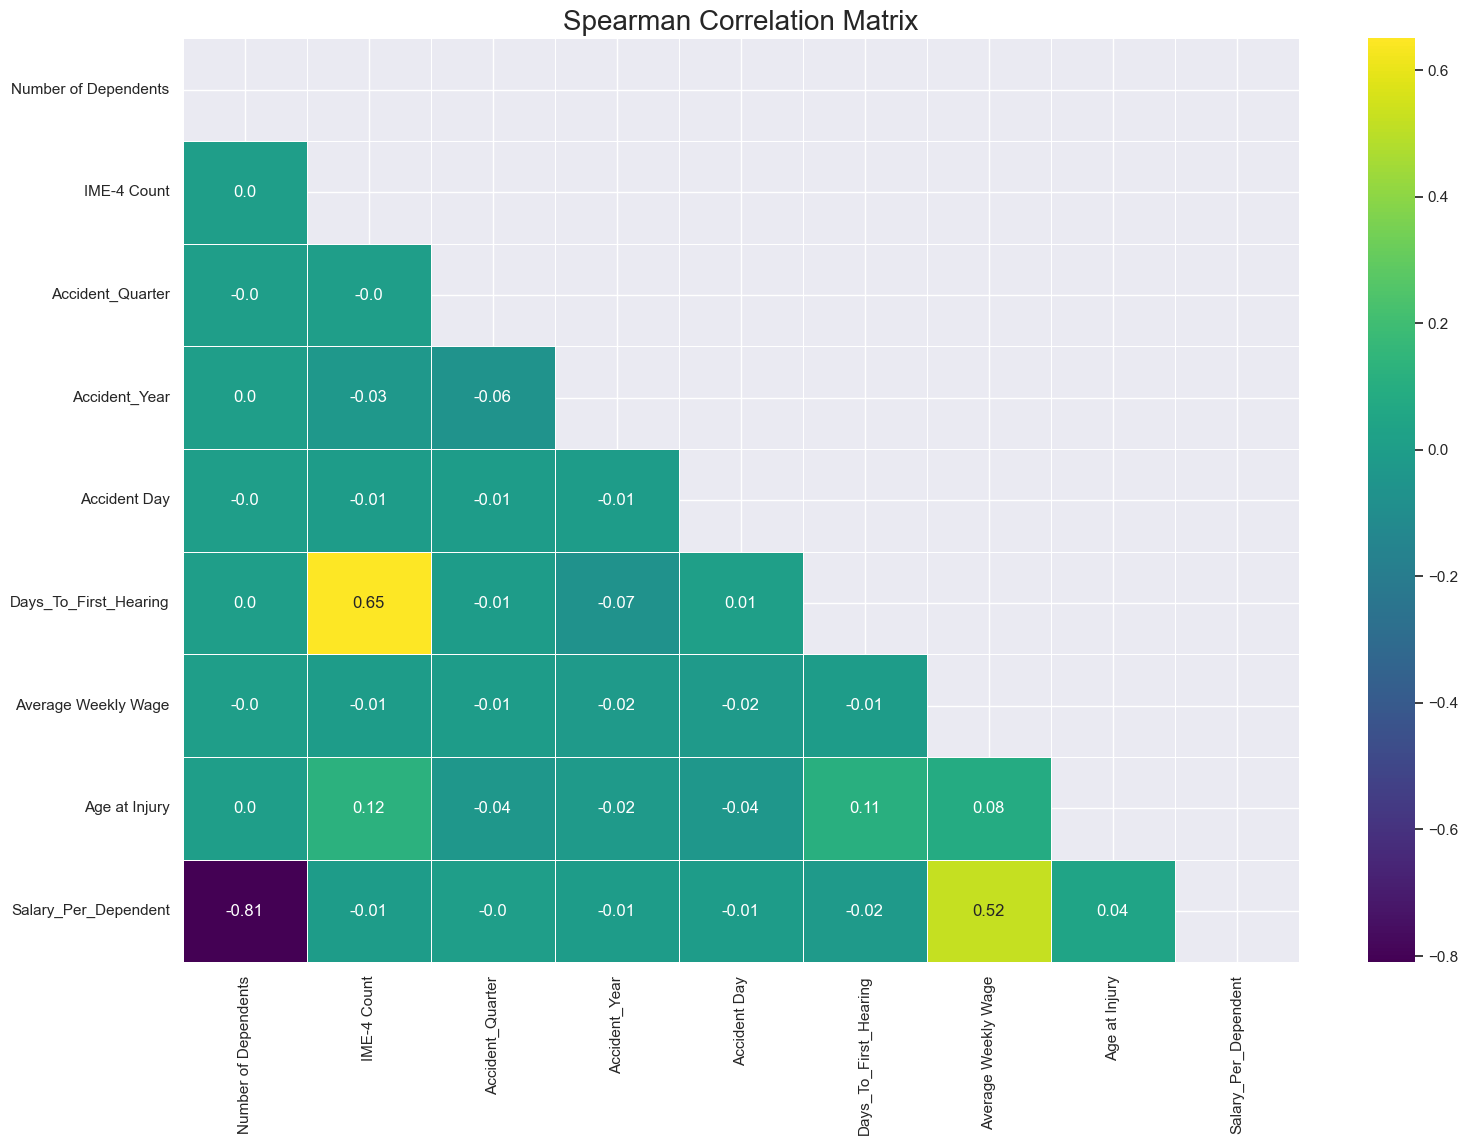

In [33]:
corr_data_numerical = X_train_num_scaled 
cor_spearman = corr_data_numerical.corr(method='spearman')

cor_heatmap(cor_spearman, 'Spearman')

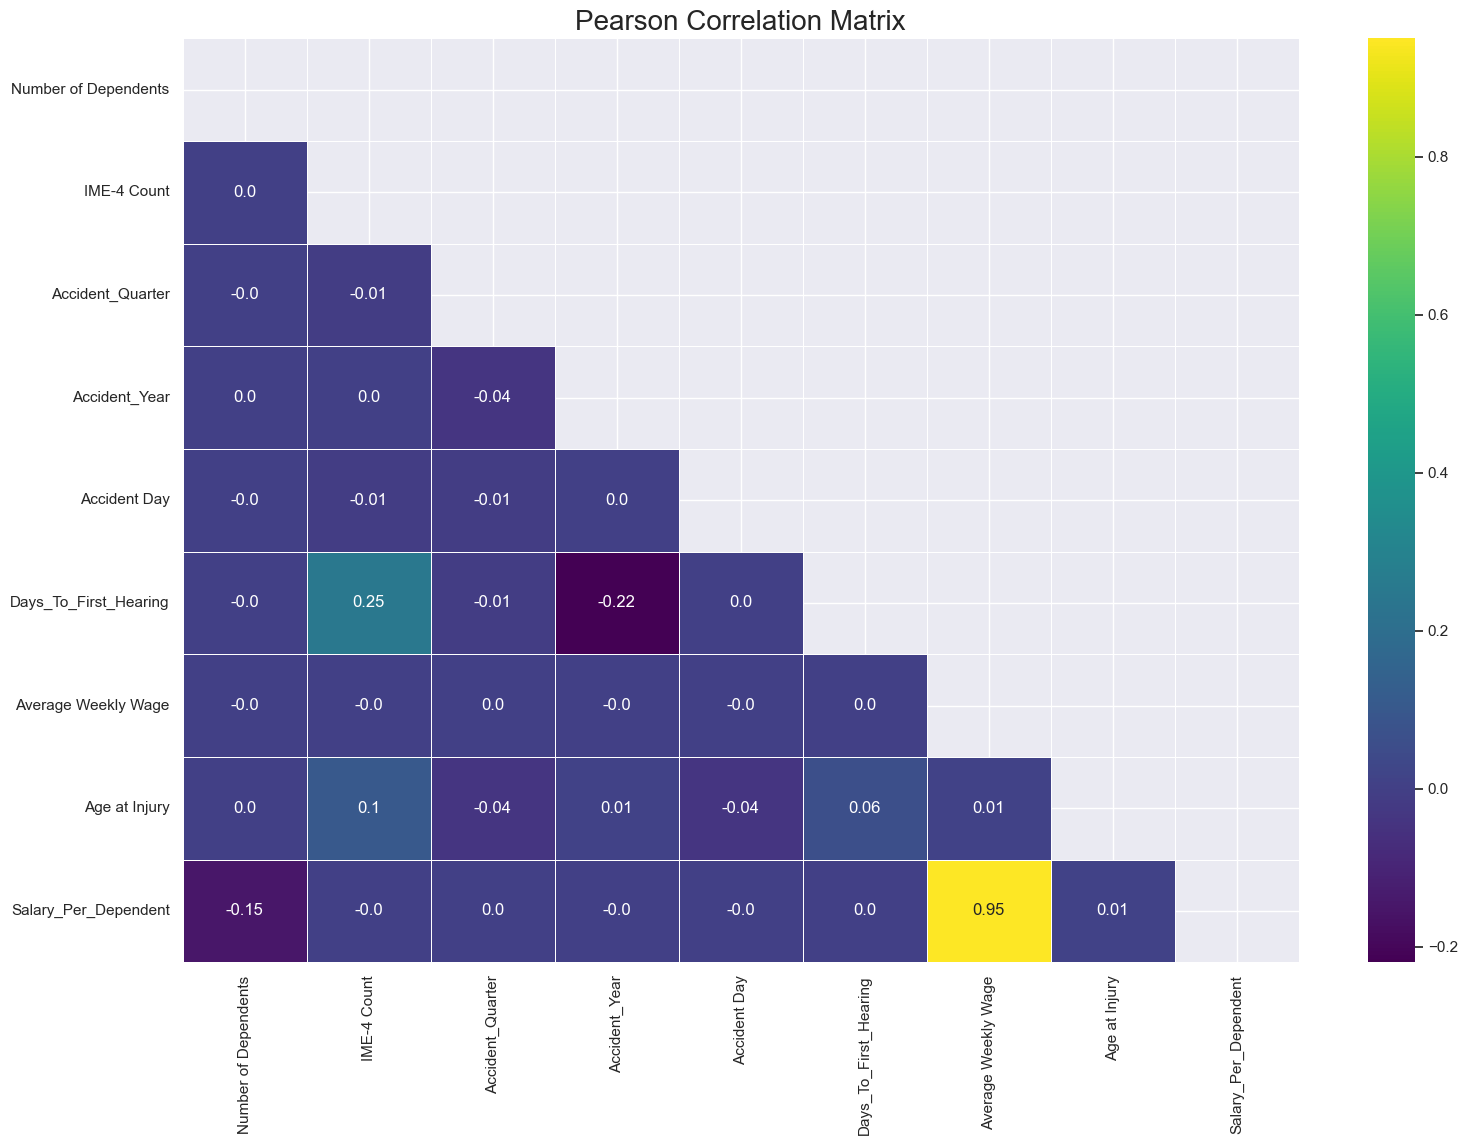

In [34]:
cor_pearson = corr_data_numerical.corr(method='pearson')

cor_heatmap(cor_pearson, 'Pearson')

> ### 4.2.2. LASSO Regression <a class="anchor" id="sub_section_4_2_2"></a>


 The LASSO (Least Absolute Shrinkage and Selection Operator) regression is used here for feature selection by fitting a model to the standardized dataset and analyzing the coefficients.

In [35]:
# Fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train_encoded)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
# Sort coefficients to observe importance
coef.sort_values()

Accident_Quarter         -0.019868
Accident Day             -0.009305
Number of Dependents     -0.003109
Average Weekly Wage       0.000000
Age at Injury             0.231640
Accident_Year             0.451288
Salary_Per_Dependent      0.503989
IME-4 Count               6.732806
Days_To_First_Hearing    10.680060
dtype: float64

**Observations:**

The LASSO model assigns non-zero coefficients only to the features it considers important.

IME-4 Count has the highest positive coefficient, indicating a strong positive relationship with the target variable, as well as Days_To_First_Hearing


Accident Day and Accident Quarter have smaller negative coefficients, implying a weaker inverse relationship with the target.

Average Weekly Wage and Number of Dependents has close to zero impact, suggesting it may not be a significant predictor in the model.

In [36]:
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind="barh", color="c")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

This function generates a horizontal bar plot of the feature importance values derived from the LASSO model, helping to visualize which features are prioritized by the model.

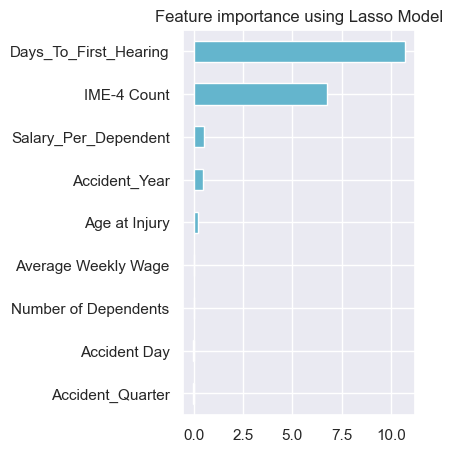

In [37]:
plot_importance(coef,'Lasso')

> ### 4.1.3. Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_3"></a>


 RFE is employed here to further validate the important features as identified by LASSO. By sequentially removing the least important features, RFE helps to refine the feature set.

In [134]:
# List of columns used in RFE process
X_train_num_scaled.columns

Index(['Number of Dependents', 'IME-4 Count', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Days_To_First_Hearing',
       'Average Weekly Wage', 'Age at Injury', 'Salary_Per_Dependent'],
      dtype='object')

Observations:
The selected features after RFE likely overlap with those identified by LASSO, suggesting consistency in feature importance.
Using both LASSO and RFE provides a more robust feature selection by cross-validating the importance of individual features.

This block of code performs RFE to identify the best subset of features by iterating over a range of feature numbers. The code aims to maximize model performance on the validation set.

In [86]:
# Number of features
nof_list=np.arange(1,9)            
high_score=0

# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train_encoded)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train_encoded)
    
    score = model.score(X_val_rfe,y_val_encoded)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

KeyboardInterrupt: 

**Observations:**

The loop evaluates models with 1 to 9 features, tracking the score for each.

The output indicates that 8 features yielded the highest validation score of 0.634192.

#### Applying RFE with the Optimal Number of Features
Once the optimal number of features is identified, the RFE model is finalized with this configuration.

In [ ]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 8)

In [ ]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train_encoded)

This shows the results of the feature selection process, listing the features selected by RFE. The code snippet confirms which features were selected as relevant by the RFE model and displays them in a boolean Series, where True indicates the feature was selected and False means it was not.

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Number of Dependents     False
IME-4 Count               True
Accident_Quarter          True
Accident_Year             True
Accident Day              True
Days_To_First_Hearing     True
Average Weekly Wage       True
Age at Injury             True
Salary_Per_Dependent      True
dtype: bool

> ### 4.1.4. Feature Importance - Decision Tree <a class="anchor" id="sub_section_4_1_4"></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
gini_importance = DecisionTreeClassifier().fit(X_train_num_scaled, y_train_encoded).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_num_scaled, y_train_encoded).feature_importances_

In [ ]:
gini_importance

array([0.02815264, 0.19095198, 0.04737234, 0.03969462, 0.07224136,
       0.09970459, 0.29332627, 0.12690894, 0.10164727])

<Axes: xlabel='Value', ylabel='Col'>

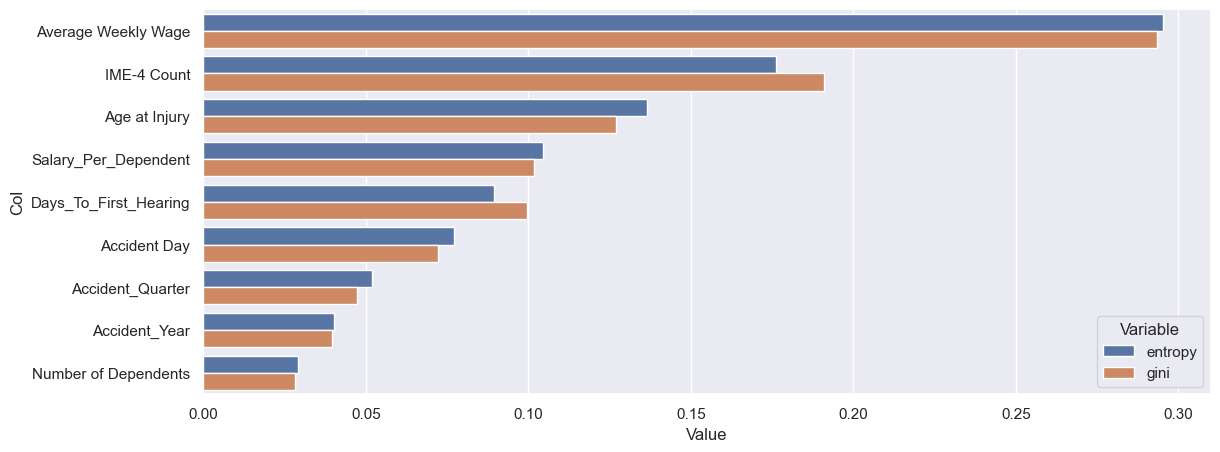

In [ ]:
import seaborn as sns

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_num_scaled.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(13,5))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)


> ### 4.1.5. Feature Importance - Random Forest <a class="anchor" id="sub_section_4_1_5"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

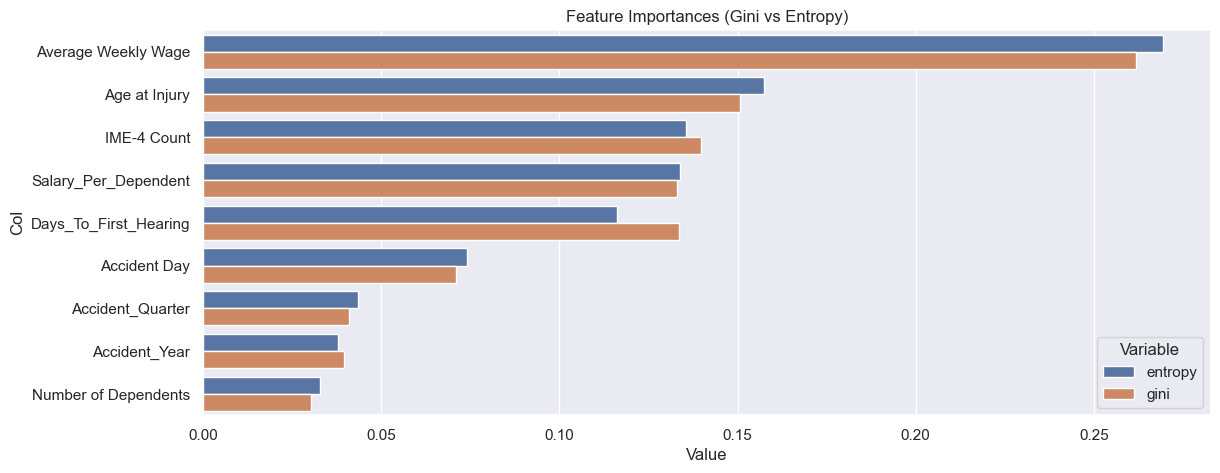

In [ ]:
# One-liner to get Random Forest feature importances for 'gini' and 'entropy'
importances = pd.DataFrame({
    'gini': RandomForestClassifier(random_state=42).fit(X_train_num_scaled, y_train_encoded).feature_importances_,
    'entropy': RandomForestClassifier(criterion='entropy', random_state=42).fit(X_train_num_scaled, y_train_encoded).feature_importances_,
    'col': X_train_num_scaled.columns
})

# Prepare data for plotting
tidy = importances.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(13, 5))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)
plt.title('Feature Importances (Gini vs Entropy)')
plt.show()


## 4.3. Categorical Features</b> <a class="anchor" id="section_4_3"></a>
Chi-squared and MIC for the categorical ones.

 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

 We'll apply the Chi-squared test on categorical features to check for independence. This test is suitable for categorical data and helps identify features that have significant associations with the target variable.

In [38]:
binary_columns

['Attorney/Representative', 'COVID-19 Indicator', 'Accident on Weekend']

In [39]:
#To make sure that we keep the preprocessed dataset without the encoded columns
X_train_processed_copy = X_train.copy()
X_val_processed_copy = X_val.copy()
df_test_processed_copy = df_test.copy()

In [40]:
X_train_processed_copy.shape

(398994, 36)

In [41]:
X_val_processed_copy.shape

(172208, 36)

In [42]:
X_val_processed_copy.columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'Carrier_District_Interaction',
       'Income_Category', 'Days_To_First_Hearing', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category', 'Zip_Code_Simplified',
       'Carrier Type Merged', 'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category', 'Industry Risk',
       'Salary_Per_Dependent'],
      dtype='object')

### Approach: Encoding Categorical Features with LabelEncoder, OneHotEncoder and Frequency encoder
As our second approach we decided to perform different type of encoding according with each categorical variable. For ordinal features (those with an inherent order like age groups), Label Encoding is applied to assign each category a unique numerical value. For nominal features with low cardinality (few unique values), One-Hot Encoding is used to create binary columns representing each category. For high-cardinality features (many unique values like zip codes), Frequency Encoding is applied to convert categories to their frequency of occurrence, reducing dimensionality without introducing too many columns.

These encoding methods are used to properly represent categorical features in a numerical format while considering their characteristics (order or cardinality), which helps models interpret them effectively.

In [43]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example columns to encode
ordinal_features = ['promptness_category', 'promptness_C2_category', 'Age Group', 'Income_Category', 'Industry Risk']
low_cardinality_cols = ['Gender', 'District Name', 'Medical Fee Region','Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category']
high_cardinality_cols = ['Carrier_Name_Simplified', 'Zip_Code_Simplified', 'Industry Code', 'County of Injury', 'Carrier Type Merged',
                         'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']


# Check for NaN or nulls
print(X_val_processed_copy[ordinal_features + low_cardinality_cols + high_cardinality_cols].isnull().sum())

promptness_category           1817
promptness_C2_category        1175
Age Group                        0
Income_Category                  0
Industry Risk                    0
Gender                           0
District Name                    0
Medical Fee Region               0
Body_Part_Category               0
Injury_Nature_Category           0
Injury_Cause_Category            0
Carrier_Name_Simplified          0
Zip_Code_Simplified              0
Industry Code                    0
County of Injury                 0
Carrier Type Merged              0
WCIO Cause of Injury Code        0
WCIO Nature of Injury Code       0
WCIO Part Of Body Code           0
dtype: int64


In [44]:
#por agora antes de descobrir o erro

# Substituir os valores NaN pela moda de cada coluna

# Substituir NaNs por moda no conjunto de treino, validação e teste
for col in ordinal_features + low_cardinality_cols + high_cardinality_cols:
    # Calcular a moda da coluna no conjunto de treino
    moda = X_train_processed_copy[col].mode()[0]
    
    # Substituir NaNs nos três conjuntos de dados pela moda calculada
    X_train_processed_copy[col] = X_train_processed_copy[col].fillna(moda)
    X_val_processed_copy[col] = X_val_processed_copy[col].fillna(moda)
    df_test_processed_copy[col] = df_test_processed_copy[col].fillna(moda)

# Verificar se ainda existem valores ausentes
print(X_train_processed_copy.isnull().sum())
print(X_val_processed_copy.isnull().sum())
print(df_test_processed_copy.isnull().sum())



Age at Injury                   0
Attorney/Representative         0
Average Weekly Wage             0
Birth Year                      0
Carrier Name                    0
Carrier Type                    0
County of Injury                0
COVID-19 Indicator              0
District Name                   0
Gender                          0
IME-4 Count                     0
Industry Code                   0
Medical Fee Region              0
WCIO Cause of Injury Code       0
WCIO Nature of Injury Code      0
WCIO Part Of Body Code          0
Zip Code                        0
Number of Dependents            0
Carrier_District_Interaction    0
Income_Category                 0
Days_To_First_Hearing           0
Accident_Quarter                0
Accident_Year                   0
Accident Day                    0
Accident on Weekend             0
Age Group                       0
promptness_category             0
promptness_C2_category          0
Zip_Code_Simplified             0
Carrier Type M

In [45]:
df_test_processed_copy['Industry Risk'].value_counts()

Industry Risk
Medium Risk     240996
High Risk        81020
Low Risk         65939
Unknown Risk        20
Name: count, dtype: int64

In [ ]:
#por agoraaaaaaaaaa

# Obter o valor mais frequente (moda) da coluna 'Industry Risk' no conjunto de treino
most_frequent_value = X_train_processed_copy['Industry Risk'].mode()[0]

# Substituir 'Unknown Risk' por esse valor no conjunto de teste
df_test_processed_copy['Industry Risk'] = df_test_processed_copy['Industry Risk'].replace('Unknown Risk', most_frequent_value)

In [47]:
# Soma de todos os valores ausentes nos três datasets
missing_values_total = (
    X_train_processed_copy.isnull().sum().sum() +
    X_val_processed_copy.isnull().sum().sum() +
    df_test_processed_copy.isnull().sum().sum()
)

print(f"Total de valores ausentes em todos os datasets: {missing_values_total}")

Total de valores ausentes em todos os datasets: 0


In [232]:
# Step 1: Label Encode ordinal features (features that have an intrinsic order)
label_encoder_1 = LabelEncoder()
for col in ordinal_features:
    X_train_processed_copy[col] = label_encoder_1.fit_transform(X_train_processed_copy[col])
    X_val_processed_copy[col] = label_encoder_1.transform(X_val_processed_copy[col])
    df_test_processed_copy[col] = label_encoder_1.transform(df_test_processed_copy[col])

# Step 2: One-Hot Encode low-cardinality nominal features
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  # Corrected parameter
one_hot_encoded_train = one_hot_encoder.fit_transform(X_train_processed_copy[low_cardinality_cols])
one_hot_encoded_val = one_hot_encoder.transform(X_val_processed_copy[low_cardinality_cols])
one_hot_encoded_test = one_hot_encoder.transform(df_test_processed_copy[low_cardinality_cols])

# Convert the one-hot encoded arrays back to DataFrame
one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=one_hot_encoder.get_feature_names_out(low_cardinality_cols), index=X_train_processed_copy.index)
one_hot_encoded_val_df = pd.DataFrame(one_hot_encoded_val, columns=one_hot_encoder.get_feature_names_out(low_cardinality_cols), index=X_val_processed_copy.index)
one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoder.get_feature_names_out(low_cardinality_cols), index=df_test_processed_copy.index)

# Concatenate the original datasets with the one-hot encoded columns
X_train_processed_copy = pd.concat([X_train_processed_copy, one_hot_encoded_train_df], axis=1)
X_val_processed_copy = pd.concat([X_val_processed_copy, one_hot_encoded_val_df], axis=1)
df_test_processed_copy = pd.concat([df_test_processed_copy, one_hot_encoded_test_df], axis=1)

# Drop the original low-cardinality nominal columns after encoding them
X_train_processed_copy.drop(columns=low_cardinality_cols, inplace=True)
X_val_processed_copy.drop(columns=low_cardinality_cols, inplace=True)
df_test_processed_copy.drop(columns=low_cardinality_cols, inplace=True)

# Step 3: Frequency Encoding for high-cardinality nominal features
for col in high_cardinality_cols:
    freq = X_train_processed_copy[col].value_counts()  # Fit on training set only
    X_train_processed_copy[col + '_freq'] = X_train_processed_copy[col].map(freq)
    X_val_processed_copy[col + '_freq'] = X_val_processed_copy[col].map(freq)
    df_test_processed_copy[col + '_freq'] = df_test_processed_copy[col].map(freq)

# Drop the original high-cardinality columns after encoding them
X_train_processed_copy.drop(columns=high_cardinality_cols, inplace=True)
X_val_processed_copy.drop(columns=high_cardinality_cols, inplace=True)
df_test_processed_copy.drop(columns=high_cardinality_cols, inplace=True)

# Final datasets after encoding
X_train_final = X_train_processed_copy
X_val_final = X_val_processed_copy
X_test_final = df_test_processed_copy

# Summary
print("Encoded X_train_final columns:", X_train_final.columns)
print("Encoded X_val_final columns:", X_val_final.columns)
print("Encoded X_test_final columns:", X_test_final.columns)


Encoded X_train_final columns: Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'COVID-19 Indicator',
       'IME-4 Count', 'Zip Code', 'Number of Dependents',
       'Carrier_District_Interaction', 'Income_Category',
       'Days_To_First_Hearing', 'Accident_Quarter', 'Accident_Year',
       'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category', 'Industry Risk',
       'Salary_Per_Dependent', 'Gender_M', 'Gender_U',
       'District Name_BINGHAMTON', 'District Name_BUFFALO',
       'District Name_HAUPPAUGE', 'District Name_NYC',
       'District Name_ROCHESTER', 'District Name_STATEWIDE',
       'District Name_SYRACUSE', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_IV',
       'Medical Fee Region_UK', 'Body_Part_Category_Lower Extremities',
       'Body_Part_Category_Multiple Body Parts', 'Body_Part_Category_Neck',
       '

### Why Are There Missing Values (NaN) in Validation and Test Sets?

During the encoding process, missing values (NaN) may appear in the validation and test sets because certain categories that exist in these sets might not be present in the training set. For instance, during frequency encoding, if a category exists only in the validation or test set but not in the training set, it will result in missing values when encoding those rows.

To address this, we can fill these missing values with a placeholder such as `0`, ensuring consistent feature representation across all datasets, for now. For next deliverable we will try to implement better approaches.

In [237]:
# Soma de todos os valores ausentes nos três datasets
missing_values_total = (
    X_train_final.isnull().sum().sum() +
    X_val_final.isnull().sum().sum() +
    X_test_final.isnull().sum().sum()
)

print(f"Total de valores ausentes em todos os datasets: {missing_values_total}")


Total de valores ausentes em todos os datasets: 5503


In [233]:
# Display all rows of the output
import pandas as pd

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Check for missing values and display all rows
print(X_test_final.isna().sum())

Age at Injury                                                          0
Attorney/Representative                                                0
Average Weekly Wage                                                    0
Birth Year                                                             0
Carrier Name                                                           0
Carrier Type                                                           0
COVID-19 Indicator                                                     0
IME-4 Count                                                            0
Zip Code                                                               0
Number of Dependents                                                   0
Carrier_District_Interaction                                           0
Income_Category                                                        0
Days_To_First_Hearing                                                  0
Accident_Quarter                                   

In [234]:
# Display all rows of the output
import pandas as pd

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Check for missing values and display all rows
print(X_val_final.isna().sum())


Age at Injury                                                          0
Attorney/Representative                                                0
Average Weekly Wage                                                    0
Birth Year                                                             0
Carrier Name                                                           0
Carrier Type                                                           0
COVID-19 Indicator                                                     0
IME-4 Count                                                            0
Zip Code                                                               0
Number of Dependents                                                   0
Carrier_District_Interaction                                           0
Income_Category                                                        0
Days_To_First_Hearing                                                  0
Accident_Quarter                                   

In [230]:
# To handle this, we will fill the missing values with 0 for now.
X_val_final.fillna(0, inplace=True)
X_test_final.fillna(0, inplace=True)

In [231]:
# Step 4: Prepare final dataset for MIC and χ² analysis
# Use only the encoded features for the MIC and chi-squared tests
mic_chi2_features = binary_columns + ordinal_features + list(one_hot_encoded_train_df.columns) + [f"{col}_freq" for col in high_cardinality_cols]
X_train_mic_chi2 = X_train_processed_copy[mic_chi2_features]

In [232]:
len(X_train_mic_chi2.columns)

48

In [233]:
X_train_mic_chi2.columns

Index(['Attorney/Representative', 'COVID-19 Indicator', 'Accident on Weekend',
       'promptness_category', 'promptness_C2_category', 'Age Group',
       'Income_Category', 'Industry Risk', 'Gender_M', 'Gender_U',
       'District Name_BINGHAMTON', 'District Name_BUFFALO',
       'District Name_HAUPPAUGE', 'District Name_NYC',
       'District Name_ROCHESTER', 'District Name_STATEWIDE',
       'District Name_SYRACUSE', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_IV',
       'Medical Fee Region_UK', 'Body_Part_Category_Lower Extremities',
       'Body_Part_Category_Multiple Body Parts', 'Body_Part_Category_Neck',
       'Body_Part_Category_NonClassificable', 'Body_Part_Category_Trunk',
       'Body_Part_Category_Upper Extremities',
       'Injury_Nature_Category_Multiple Injuries',
       'Injury_Nature_Category_Occupational Disease or Cumulative Injury',
       'Injury_Nature_Category_Specific Injury',
       'Injury_Cause_Category_COVID-19 Injury',
 

In [234]:
X_train_final.shape

(398994, 63)

In [235]:
X_val_final.shape

(172208, 63)

In [236]:
X_test_final.shape

(387975, 62)

#### Chi-Squared Test for Feature Selection
The Chi-squared test helps us identify the most relevant categorical and binary features by evaluating their independence with the target variable. In this analysis, we set a threshold to keep the 25 most relevant features.

In [237]:
#Chi-square test
threshold = 25 #we want to only keep the 20 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train_mic_chi2,y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train_mic_chi2.columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

In [239]:
names_Chi2
# high_score_features_chi2  # Output the list of selected top features

['WCIO Nature of Injury Code_freq',
 'Carrier Type Merged_freq',
 'WCIO Part Of Body Code_freq',
 'WCIO Cause of Injury Code_freq',
 'Zip_Code_Simplified_freq',
 'Carrier_Name_Simplified_freq',
 'Industry Code_freq',
 'County of Injury_freq',
 'Attorney/Representative',
 'Body_Part_Category_Trunk',
 'Income_Category',
 'Injury_Cause_Category_Strain or Injury By',
 'Injury_Cause_Category_Cut, Puncture, Scrape',
 'promptness_C2_category',
 'promptness_category',
 'Body_Part_Category_Upper Extremities',
 'Age Group',
 'COVID-19 Indicator',
 'Injury_Cause_Category_Fall, Slip, or Trip',
 'Injury_Cause_Category_COVID-19 Injury',
 'Injury_Cause_Category_Motor Vehicle',
 'Body_Part_Category_Lower Extremities',
 'Body_Part_Category_NonClassificable',
 'Injury_Cause_Category_Struck or Injured by',
 'Body_Part_Category_Neck']

> ### Mutual Information Criterion (MIC) for Feature Selection <a class="anchor" id="sub_section_4_2_2"></a>

The Mutual Information Criterion is used to measure the dependence between each feature and the target variable. By setting a threshold, we retain only the most relevant features.

In [240]:
 #MIC 
# Set the threshold for the top features to select
threshold = 25
high_score_features_MIC = []
scores = []
names_MIC = []

# Apply mutual information criterion
feature_scores = mutual_info_classif(X_train_mic_chi2, y_train, random_state=42)

# Sort and select the top features
for score, f_name in sorted(zip(feature_scores, X_train_mic_chi2.columns), reverse=True)[:threshold]:
    high_score_features_MIC.append(f_name)
    scores.append(score)
    names_MIC.append(f_name)
    
# Display the list of selected top features by MIC
names_MIC

['Attorney/Representative',
 'WCIO Nature of Injury Code_freq',
 'WCIO Part Of Body Code_freq',
 'WCIO Cause of Injury Code_freq',
 'Carrier_Name_Simplified_freq',
 'Industry Code_freq',
 'Income_Category',
 'Zip_Code_Simplified_freq',
 'promptness_C2_category',
 'Carrier Type Merged_freq',
 'Injury_Nature_Category_Specific Injury',
 'Industry Risk',
 'promptness_category',
 'Age Group',
 'Body_Part_Category_Trunk',
 'Gender_M',
 'Injury_Cause_Category_Strain or Injury By',
 'County of Injury_freq',
 'Injury_Cause_Category_Cut, Puncture, Scrape',
 'Body_Part_Category_Upper Extremities',
 'Medical Fee Region_IV',
 'District Name_NYC',
 'Injury_Cause_Category_Fall, Slip, or Trip',
 'COVID-19 Indicator',
 'Injury_Cause_Category_COVID-19 Injury']

### Intersection of Selected Features by Chi-squared and MIC
To identify the most relevant categorical features, we take the intersection of features selected by both Chi-squared and MIC methods.

In [241]:
# Find common features between Chi-squared and MIC selections
common_categorical_features = list(set(names_Chi2).intersection(set(names_MIC)))
features_selected = common_categorical_features  # Final list of selected features
features_selected  # Display the list of intersected features

['Income_Category',
 'Industry Code_freq',
 'Injury_Cause_Category_Cut, Puncture, Scrape',
 'promptness_C2_category',
 'Body_Part_Category_Trunk',
 'WCIO Nature of Injury Code_freq',
 'Attorney/Representative',
 'Injury_Cause_Category_Strain or Injury By',
 'COVID-19 Indicator',
 'promptness_category',
 'WCIO Cause of Injury Code_freq',
 'Injury_Cause_Category_Fall, Slip, or Trip',
 'Age Group',
 'Body_Part_Category_Upper Extremities',
 'Carrier_Name_Simplified_freq',
 'County of Injury_freq',
 'Carrier Type Merged_freq',
 'Injury_Cause_Category_COVID-19 Injury',
 'WCIO Part Of Body Code_freq',
 'Zip_Code_Simplified_freq']

## 4.4. Final Features</b> <a class="anchor" id="section_4_4"></a>



| Predictor             | Spearman                         | Pearson                  | Lasso   | RFE LR   | Decision Trees & RF Importance        | What to do? (One possible way to "solve")        |
|-----------------------|----------------------------------|--------------------------|---------|----------|----------------------------------------|--------------------------------------------------|
| Number of Dependents  | High (-0.81 with Salary/Depend) | Low                      | Discard | Discard  | Low                                    | Discard                                          |
| IME-4 Count           | High (0.85 with Days to Hear)   | Low                      | Keep    | Keep     | High                                   | Include in the model                             |
| Accident_Quarter      | Low                             | Low                      | Discard | Keep     | Low                               | Discard         |
| Accident_Year         | Low                             | Low                      | Keep    | Keep     | Low                               | Discard                            |
| Accident Day          | Low                             | Low                      | Discard | Keep     | Low                                    | Discard                                          |
| Days_To_First_Hearing | High (0.85 with IME-4 Count)    | Low                      | Keep    | Keep     | High                                   | Include in the model                             |
| Average Weekly Wage   | Moderate (0.52 with Salary/Dep) | High (0.95)              | Discard | Keep     | High                                   | Discard                             |
| Age at Injury         | Low                             | Low                      | Keep    | Keep     | High                                   | Include in the model                
| Salary_Per_Dependent  | High (-0.81 and 0.52)           | High (0.95)              | Keep (0.50)  | Keep     | High                                   | Include in the model                             |




In [242]:
final_features = [
    # Categorical features selected through MIC and chi2
    'Income_Category',
    'Industry Code_freq',
    'Injury_Cause_Category_Cut, Puncture, Scrape',
    'promptness_C2_category',
    'Body_Part_Category_Trunk',
    'WCIO Nature of Injury Code_freq',
    'Attorney/Representative',
    'Injury_Cause_Category_Strain or Injury By',
    'COVID-19 Indicator',
    'promptness_category',
    'WCIO Cause of Injury Code_freq',
    'Injury_Cause_Category_Fall, Slip, or Trip',
    'Age Group',
    'Body_Part_Category_Upper Extremities',
    'Carrier_Name_Simplified_freq',
    'County of Injury_freq',
    'Carrier Type Merged_freq',
    'Injury_Cause_Category_COVID-19 Injury',
    'WCIO Part Of Body Code_freq',
    'Zip_Code_Simplified_freq',
    # Important numerical features
    'IME-4 Count', 'Salary_Per_Dependent','Days_To_First_Hearing','Age at Injury'  
]


# Extracting the final features from the processed datasets
X_train_final = X_train_processed_copy[final_features]
X_val_final = X_val_processed_copy[final_features]
X_test_final = df_test_processed_copy[final_features]

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

X_train_final shape: (398994, 24)
X_val_final shape: (172208, 24)
X_test_final shape: (387975, 24)


### 4. Build a Simple Model and Assess Performance
#### Problem Type and Model Selection
The problem we are dealing with is a classification problem since our goal is to predict the type of variable claim injury as our target variable. As it is a categorical variable we decided to try algorithms like Logistic Regression, Random Forest, XGBoost and other classification models. To start, a simple logistic regression was built due to its interpretability and ease of use. Moreover, it supports an effective starting point for further analysis and comparison against more complex models.

#### Cross-Validation for Performance Assessment
In order to assess the model’s performance we decided to use cross validation. This technique ensures a reliable evaluation by divding our data into multiple folds and having training/testing the model on different subsets. This really helps to avoid overfitting (which was a problem that from the beginning we identify we had) and provides a comprehensive view of how well the model generalizes to unseen data.

#### Metrics for Evaluation
For model evaluation we look into some metrics like:
Precision, Recall, and F1-Score given that our target variable is claim injury type, and the dataset has an imbalanced class distributions. 
Precision tells us how many of the predicted positive instances are actually positive, while recall shows how many of the actual positives were correctly predicted. **F1 Score* provides a balance between precision and recall, which is crucial when handling imbalanced data.
Even though accuracy can provide a general idea of overall correctness, it is not our main focus due to the class imbalance. Relying solely on accuracy could give misleading insights, as it may be high even if the model is not performing well on minority classes

With these metrics we ensure a global evaluation of the model, especially considering the facts above mentioned such as imbalanced dataset and helps guiding model improvement effectively.


# 5. Modeling <a class="anchor" id="chapter5"></a>

> ## Logistic Regression

### **Standard Scaler**

Logistic Regression Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.94      0.80    202442
           1       0.62      0.42      0.50    103933
           2       0.54      0.34      0.42     92619

    accuracy                           0.67    398994
   macro avg       0.62      0.57      0.57    398994
weighted avg       0.64      0.67      0.64    398994

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------

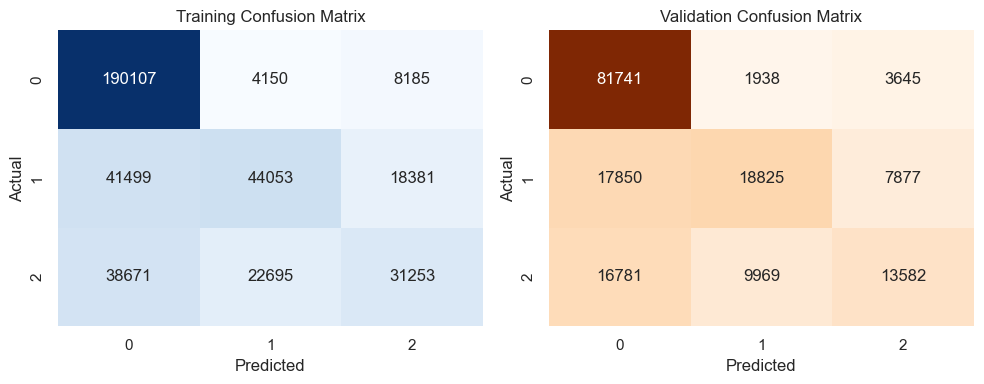

In [243]:
# Scale features
scaler = StandardScaler()
final_features_X_train_scaled_std = scaler.fit_transform(X_train_final)
final_features_X_val_scaled_std = scaler.transform(X_val_final)
final_features_df_test_scaled_std = scaler.transform(X_test_final)

# Logistic Regression Model
log_reg_std = LogisticRegression(max_iter=1000, random_state=42)
log_reg_std.fit(final_features_X_train_scaled_std, y_train_encoded)
pred_train_log_final_std = log_reg_std.predict(final_features_X_train_scaled_std)
pred_val_log_final_std = log_reg_std.predict(final_features_X_val_scaled_std)

# Metrics for Logistic Regression
print("Logistic Regression Metrics:")
metrics(y_train_encoded, pred_train_log_final_std, y_val_encoded, pred_val_log_final_std)

### **Min Max Scaler**

Logistic Regression Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.94      0.80    202442
           1       0.62      0.42      0.50    103933
           2       0.53      0.34      0.41     92619

    accuracy                           0.66    398994
   macro avg       0.62      0.56      0.57    398994
weighted avg       0.64      0.66      0.63    398994

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------

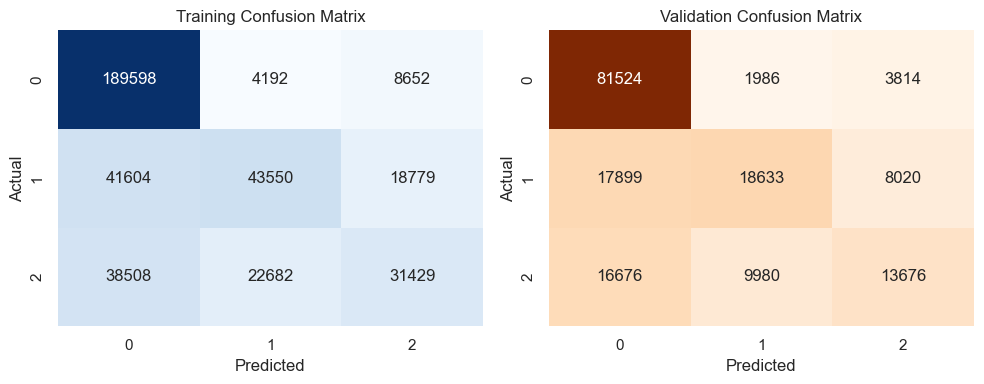

In [253]:
# Scale features
scaler = MinMaxScaler()
final_features_X_train_scaled_minmax = scaler.fit_transform(X_train_final)
final_features_X_val_scaled_minmax = scaler.transform(X_val_final)
final_features_df_test_scaled_minmax = scaler.transform(X_test_final)

# Logistic Regression Model
log_reg_minmax = LogisticRegression(max_iter=1000, random_state=42)
log_reg_minmax.fit(final_features_X_train_scaled_minmax, y_train_encoded)
pred_train_log_final_minmax = log_reg_minmax.predict(final_features_X_train_scaled_minmax)
pred_val_log_final_minmax = log_reg_minmax.predict(final_features_X_val_scaled_minmax)

# Metrics for Logistic Regression
print("Logistic Regression Metrics:")
metrics(y_train_encoded, pred_train_log_final_minmax, y_val_encoded, pred_val_log_final_minmax)

### **Robust Scaler**

Logistic Regression Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.94      0.80    202442
           1       0.62      0.42      0.50    103933
           2       0.54      0.34      0.42     92619

    accuracy                           0.66    398994
   macro avg       0.62      0.57      0.57    398994
weighted avg       0.64      0.66      0.64    398994

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------

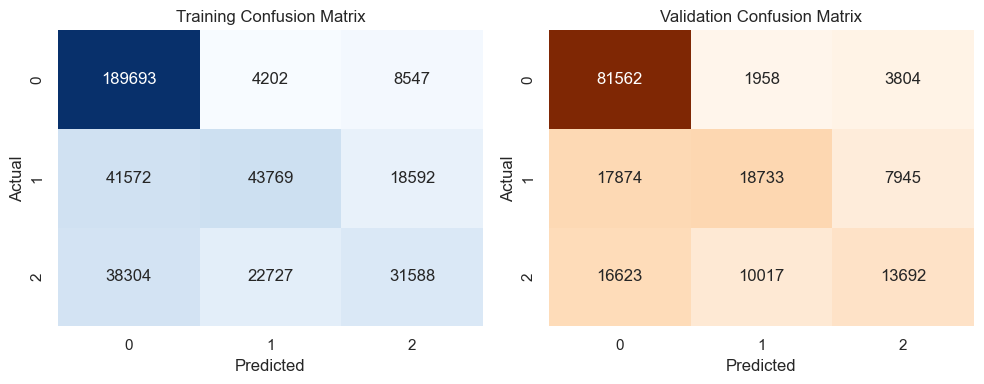

In [252]:
# Scale features
scaler = RobustScaler()
final_features_X_train_scaled_rob = scaler.fit_transform(X_train_final)
final_features_X_val_scaled_rob = scaler.transform(X_val_final)
final_features_df_test_scaled_rob = scaler.transform(X_test_final)

# Logistic Regression Model
log_reg_rob = LogisticRegression(max_iter=1000, random_state=42)
log_reg_rob.fit(final_features_X_train_scaled_rob, y_train_encoded)
pred_train_log_final_rob = log_reg_rob.predict(final_features_X_train_scaled_rob)
pred_val_log_final_rob = log_reg_rob.predict(final_features_X_val_scaled_rob)

# Metrics for Logistic Regression
print("Logistic Regression Metrics:")
metrics(y_train_encoded, pred_train_log_final_rob, y_val_encoded, pred_val_log_final_rob)

##### Train test Split
| Model Name | Scaler | Resampling Technique | F1 Score (Train)| F1 Score (Validation)|
|------------|-------------|----------------------|------------------|-----------------------|
| Logistic Regression | Standard | None  |     0.57       |      0.56              |
| Logistic Regression | MinMax | None  |         0.56         |        0.56              | 
| Logistic Regression  | Robust | None   |          0.56      |        0.56          |  


> ## KNN
1. Simple KNN Model
### **Standard Scaler**


K-Nearest Neighbors Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.95      0.84    202442
           1       0.70      0.62      0.66    103933
           2       0.72      0.40      0.51     92619

    accuracy                           0.74    398994
   macro avg       0.72      0.66      0.67    398994
weighted avg       0.73      0.74      0.72    398994

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------

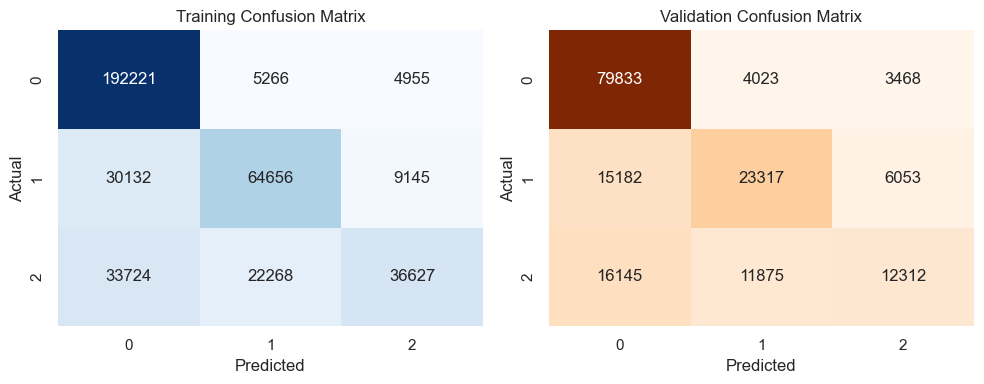

In [250]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn_std = KNeighborsClassifier(n_neighbors=6)
knn_std.fit(final_features_X_train_scaled_std, y_train_encoded)
pred_train_knn_final_std = knn_std.predict(final_features_X_train_scaled_std)
pred_val_knn_final_std = knn_std.predict(final_features_X_val_scaled_std)

# Metrics for K-Nearest Neighbors
print("\nK-Nearest Neighbors Metrics:")
metrics(y_train_encoded, pred_train_knn_final_std, y_val_encoded, pred_val_knn_final_std)

KNN Standard Scaler CV

K-Nearest Neighbors Cross-Validation Scores: [0.57993193 0.58330905 0.58236143 0.58298812 0.58258636]
Mean Cross-Validation Score for K-Nearest Neighbors: 0.5822353780657548

K-Nearest Neighbors Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.95      0.84    202442
           1       0.70      0.62      0.66    103933
           2       0.72      0.40      0.51     92619

    accuracy                           0.74    398994
   macro avg       0.72      0.66      0.67    398994
weighted avg       0.73      0.74      0.72    398994

___________________________________________________________________________________________

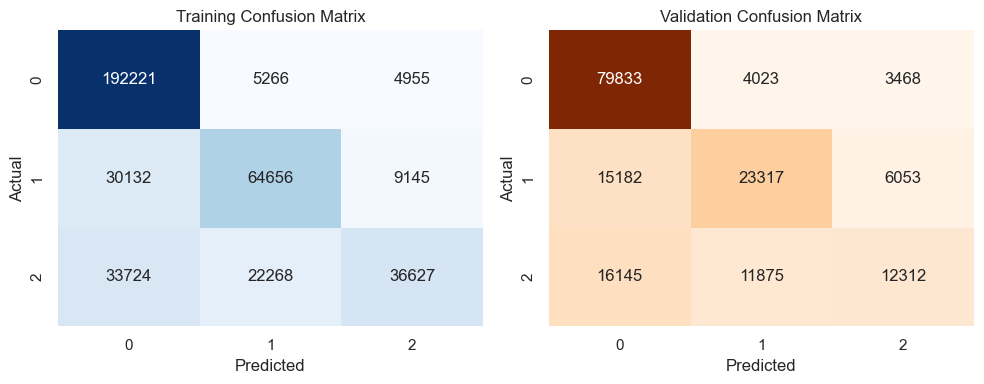

In [251]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Initialize the KNN model with 6 neighbors
knn_std = KNeighborsClassifier(n_neighbors=6)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for KNN
cv_scores_knn = cross_val_score(knn_std, final_features_X_train_scaled_std, y_train_encoded, cv=kf, scoring='f1_macro')

# Print cross-validation results
print("K-Nearest Neighbors Cross-Validation Scores:", cv_scores_knn)
print("Mean Cross-Validation Score for K-Nearest Neighbors:", cv_scores_knn.mean())

# Fit the KNN model on the full training data after cross-validation
knn_std.fit(final_features_X_train_scaled_std, y_train_encoded)

# Calculate metrics for training and validation sets
pred_train_knn_final_std = knn_std.predict(final_features_X_train_scaled_std)
pred_val_knn_final_std = knn_std.predict(final_features_X_val_scaled_std)

# Metrics for K-Nearest Neighbors
print("\nK-Nearest Neighbors Metrics:")
metrics(y_train_encoded, pred_train_knn_final_std, y_val_encoded, pred_val_knn_final_std)

2. KNN with KD-Tree as algorithm

In [ ]:

# # # K-Nearest Neighbors Model with KD-Tree
# knn_kd_tree = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='kd_tree')
# knn_kd_tree.fit(final_features_X_train_scaled_rob, y_train_encoded)
# pred_train_knn_final_kd = knn_kd_tree.predict(final_features_X_train_scaled_rob)
# pred_val_knn_final_kd = knn_kd_tree.predict(final_features_X_val_scaled_rob)

# # # Metrics for K-Nearest Neighbors using KD-Tree
# print("\nK-Nearest Neighbors (KD-Tree) Metrics:")
# metrics(y_train_encoded, pred_train_knn_final_kd, y_val_encoded, pred_val_knn_final_kd)

###DEMORA IMENSO TEMPO

3. KNN with Brute as algorithm

In [ ]:
# # # K-Nearest Neighbors Model with KD-Tree
# knn_brute = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute')
# knn_brute.fit(final_features_X_train_scaled_rob, y_train_encoded)
# pred_train_knn_final_brute = knn_brute.predict(final_features_X_train_scaled_rob)
# pred_val_knn_final_brute = knn_brute.predict(final_features_X_val_scaled_rob)

# # # Metrics for K-Nearest Neighbors using KD-Tree
# print("\nK-Nearest Neighbors (Brute) Metrics:")
# metrics(y_train_encoded, pred_train_knn_final_brute, y_val_encoded, pred_val_knn_final_brute)

##DEMORA IMENSO TEMPO 

| Model Name              | Scaler | Split Method     | F1 Score (Train) | F1 Score (Validation) |
|--------------------------|------------------|------------------|------------------|-----------------------|
| KNN  | Standard | Train Test Split  |       0.67        |      0.59           |  
| KNN | Standard | Stratified K-Fold  |       0.67       |         0.57           | 
| K-Nearest Neighbors -  kd_tree   |   Robust Scaler          |  Train-Test Split |             |                  |
| K-Nearest Neighbors - brute   |    Robust Scaler         |  Train-Test Split |             |                  |


> ### Decision Trees 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    202442
           1       1.00      1.00      1.00    103933
           2       1.00      1.00      1.00     92619

    accuracy                           1.00    398994
   macro avg       1.00      1.00      1.00    398994
weighted avg       1.00      1.00      1.00    398994

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

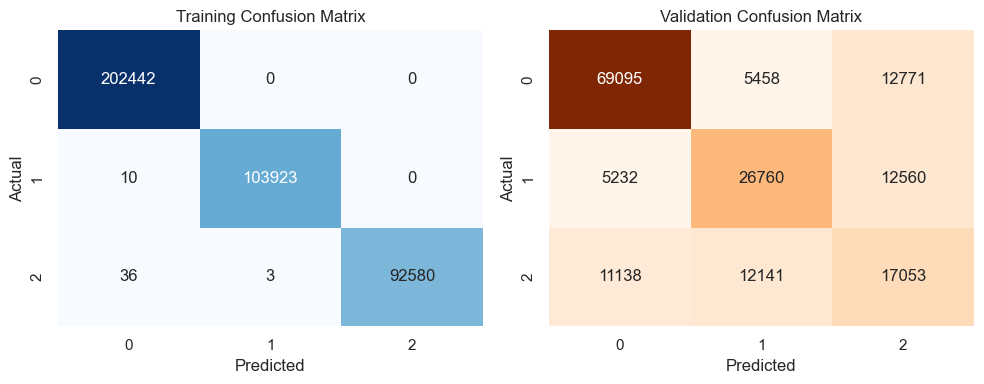

In [245]:
# Decision Tree Model
dt_std = DecisionTreeClassifier(random_state=42)

# Fit model with final features
dt_std.fit(final_features_X_train_scaled_std, y_train_encoded)
y_pred_dt_final = dt_std.predict(final_features_X_val_scaled_std)

# Metrics for Decision Tree
dt_std.fit(final_features_X_train_scaled_std, y_train_encoded)
pred_train_dt_final_std = dt_std.predict(final_features_X_train_scaled_std)
pred_val_dt_final_std = dt_std.predict(final_features_X_val_scaled_std)
metrics(y_train_encoded, pred_train_dt_final_std, y_val_encoded, pred_val_dt_final_std)

Fit Decision Tree model with pruning parameters for final features and potential value features since we have overfitting

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.93      0.82    202442
           1       0.58      0.57      0.58    103933
           2       0.58      0.25      0.35     92619

    accuracy                           0.68    398994
   macro avg       0.63      0.59      0.58    398994
weighted avg       0.66      0.68      0.65    398994

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

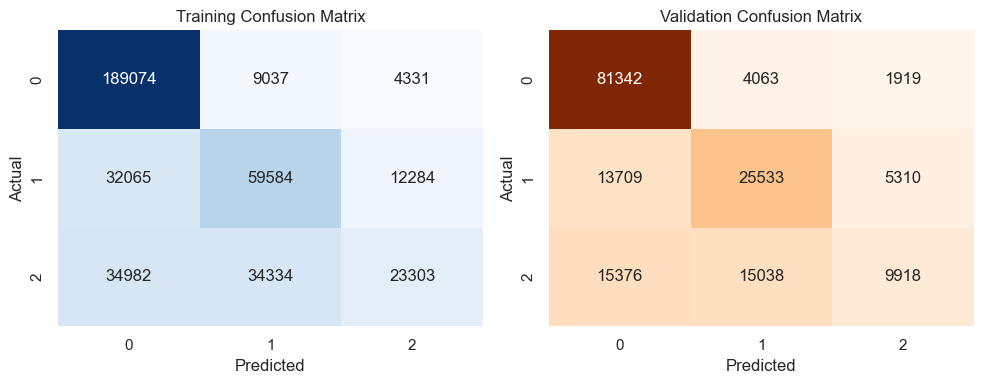

In [246]:
# Pruned Decision Tree Classifier
pruned_dt_std = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split =150, min_samples_leaf=150)

# Fit pruned Decision Tree model with final features and calculate metrics for training and validation
pruned_dt_std.fit(final_features_X_train_scaled_std, y_train_encoded)
pred_train_pruned_dt_std = pruned_dt_std.predict(final_features_X_train_scaled_std)
pred_val_pruned_dt_std = pruned_dt_std.predict(final_features_X_val_scaled_std)
metrics(y_train_encoded, pred_train_pruned_dt_std, y_val_encoded, pred_val_pruned_dt_std)

| Model Name | Scaler | Resampling Technique | F1 Score (Train)| F1 Score (Validation)|
|------------|-------------|----------------------|------------------|-----------------------|
| Decision Tree  | Standard | None  |        1     |        0.6       |
| Pruned Decision Tree | Standard | None  |       0.58       |       0.58             |


> ## Random forest

Cross-validation scores: [0.57655466 0.579033   0.57530949 0.57583797 0.57608185]
Mean cross-validation score: 0.5765633933696186
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.96      0.81    202442
           1       0.63      0.55      0.58    103933
           2       0.69      0.22      0.34     92619

    accuracy                           0.68    398994
   macro avg       0.67      0.58      0.58    398994
weighted avg       0.68      0.68      0.64    398994

___________________________________________________________________________________________________________
                                                VALIDATIO

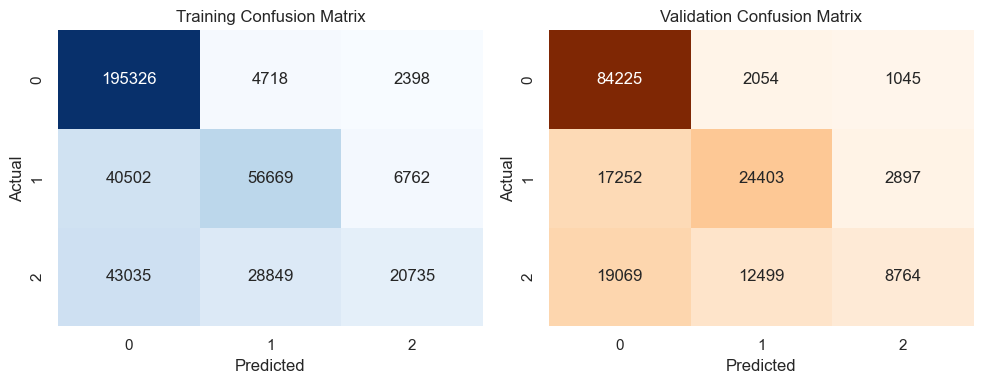

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Initialize the Random Forest model
rf_std = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_std, final_features_X_train_scaled_std, y_train_encoded, cv=kf, scoring='f1_macro')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# After cross-validation, fit the model on the full training data
rf_std.fit(final_features_X_train_scaled_std, y_train_encoded)

# Calculate metrics for training and validation sets
pred_train_rf_std = rf_std.predict(final_features_X_train_scaled_std)
pred_val_rf_std = rf_std.predict(final_features_X_val_scaled_std)
metrics(y_train_encoded, pred_train_rf_std, y_val_encoded, pred_val_rf_std)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.96      0.81    202442
           1       0.63      0.55      0.58    103933
           2       0.69      0.22      0.34     92619

    accuracy                           0.68    398994
   macro avg       0.67      0.58      0.58    398994
weighted avg       0.68      0.68      0.64    398994

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

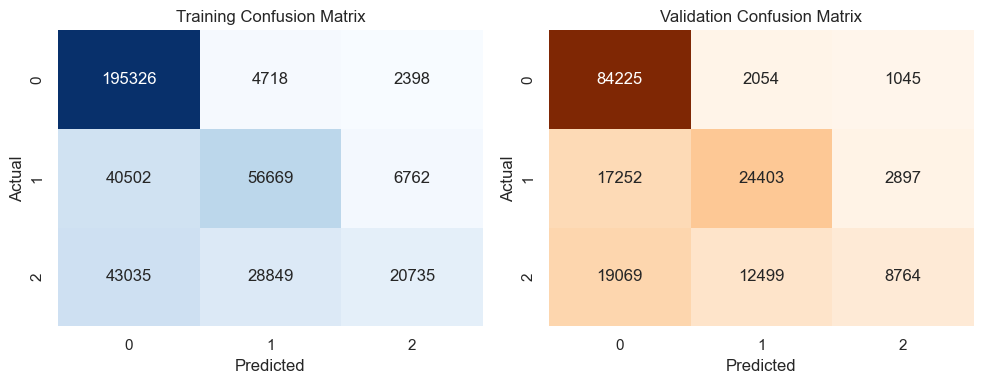

In [248]:
# Fit Random Forest model with final features and potential value features
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_std = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit Random Forest model with final features and calculate metrics for training and validation
rf_std.fit(final_features_X_train_scaled_std, y_train_encoded)
pred_train_rf_std= rf_std.predict(final_features_X_train_scaled_std)
pred_val_rf_std = rf_std.predict(final_features_X_val_scaled_std)
metrics(y_train_encoded, pred_train_rf_std, y_val_encoded, pred_val_rf_std)

| Model Name | Scaler | Split Method | F1 Score (Train)| F1 Score (Validation)| 
|------------|-------------|----------------------|------------------|-----------------------|
| Random Forest  | Standard | Cross Validation  |     0.58        |        0.58    |
| Random Forest  | Standard | Train Test Split  |      0.58      |     0.58        |


> ## XGBoost

In [254]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 0.1/124.9 MB 1.4 MB/s eta 0:01:28
   ---------------------------------------- 0.3/124.9 MB 1.6 MB/s eta 0:01:20
   ---------------------------------------- 0.3/124.9 MB 1.4 MB/s eta 0:01:29
   ---------------------------------------- 0.4/124.9 MB 1.5 MB/s eta 0:01:24
   ---------------------------------------- 0.5/124.9 MB 1.5 MB/s eta 0:01:26
   ---------------------------------------- 0.6/124.9 MB 1.4 MB/s eta 0:01:30
   ---------------------------------------- 0.7/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.8/124.9 MB 1.4 MB/s eta 0:01:31
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:34
   ---------------------------------------- 1.0/124.9 MB 1.4 MB/s eta 0:01:29
   ---------------------------------------- 1.1/124.9 MB 1.4 MB/s eta 0


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------- ----------------- 70.7/124.9 MB 2.9 MB/s eta 0:00:19
   ---------------------- ----------------- 70.8/124.9 MB 2.9 MB/s eta 0:00:19
   ---------------------- ----------------- 71.0/124.9 MB 2.9 MB/s eta 0:00:19
   ---------------------- ----------------- 71.2/124.9 MB 2.9 MB/s eta 0:00:19
   ---------------------- ----------------- 71.3/124.9 MB 2.9 MB/s eta 0:00:19
   ---------------------- ----------------- 71.5/124.9 MB 2.9 MB/s eta 0:00:19
   ---------------------- ----------------- 71.7/124.9 MB 2.9 MB/s eta 0:00:19
   ----------------------- ---------------- 71.9/124.9 MB 2.9 MB/s eta 0:00:19
   ----------------------- ---------------- 72.0/124.9 MB 2.9 MB/s eta 0:00:19
   ----------------------- ---------------- 72.2/124.9 MB 2.9 MB/s eta 0:00:19
   ----------------------- ---------------- 72.5/124.9 MB 2.9 MB/s eta 0:00:18
   ----------------------- ---------------- 72.6/124.9 MB 2.9 MB/s eta 0:00:19
   ----------------------- ---------------- 72.8/124

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.96      0.89    202442
           1       0.73      0.74      0.74    103933
           2       0.65      0.39      0.49     92619

    accuracy                           0.77    398994
   macro avg       0.74      0.70      0.70    398994
weighted avg       0.76      0.77      0.76    398994

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

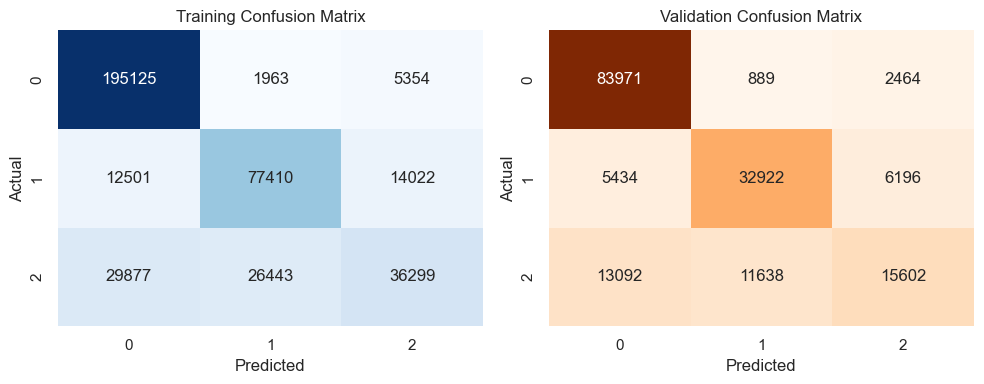

In [255]:
# Fit XGBoost model with final features and potential value features
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_std = XGBClassifier(n_estimators=100, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Fit XGBoost model with final features and calculate metrics for training and validation
xgb_std.fit(final_features_X_train_scaled_std, y_train_encoded)
pred_train_xgb_std = xgb_std.predict(final_features_X_train_scaled_std)
pred_val_xgb_std = xgb_std.predict(final_features_X_val_scaled_std)

metrics(y_train_encoded, pred_train_xgb_std, y_val_encoded, pred_val_xgb_std)

| Model Name | Scaler | Split Method | F1 Score (Train)| F1 Score (Validation)| 
|------------|-------------|----------------------|------------------|-----------------------|
| XGBoost | Standard | Train Test Split  |        0.70     |    0.70         |